In [1]:
import requests
import io
import datetime

import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [2]:
# Colabではコメントアウトを外す。

# from google.colab import drive
# drive.mount('/content/drive')

# GOOGLE_MY_DRIVE = "/content/drive/MyDrive/code/input/"


INPUT_DIR = "input/"

# INPUT_DIR = GOOGLE_MY_DRIVE

In [3]:
df = pd.read_csv(INPUT_DIR + 'hourly.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

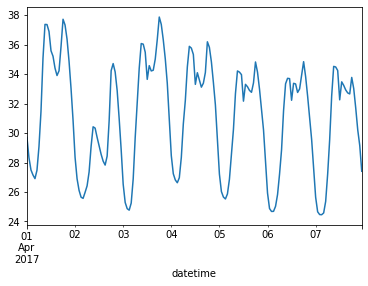

In [4]:
start = datetime.datetime(2017, 4, 1)
end = datetime.datetime(2017, 4, 8)

cond = (df.index >= start) & (df.index < end)

df[cond]['power'].plot()

plt.show()

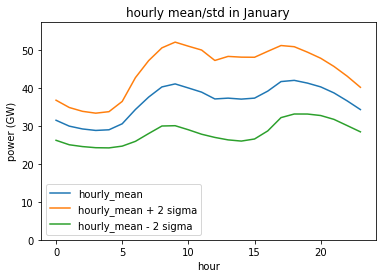

In [5]:
# 寒い時期は9時頃や18時頃にピークがある
df['hour'] = df.index.hour
df_jan = df[df.index.month == 1]

hour_mean = df_jan.groupby("hour").mean()["power"]
hour_std = df_jan.groupby("hour").std()["power"]

hour_mean.plot(label='hourly_mean')
(hour_mean + 2 * hour_std) .plot(label='hourly_mean + 2 sigma')
(hour_mean - 2 * hour_std) .plot(label='hourly_mean - 2 sigma')

plt.title('hourly mean/std in January')
plt.legend()
plt.ylim(0, (hour_mean + 2 * hour_std).max() * 1.1)
plt.ylabel('power (GW)')
plt.show()

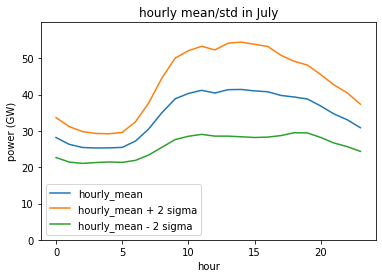

In [6]:
# 7月は日中は高い水準で安定している。
df_jul = df[df.index.month == 7]

hour_mean = df_jul.groupby("hour").mean()["power"]
hour_std = df_jul.groupby("hour").std()["power"]

hour_mean.plot(label='hourly_mean')
(hour_mean + 2 * hour_std) .plot(label='hourly_mean + 2 sigma')
(hour_mean - 2 * hour_std) .plot(label='hourly_mean - 2 sigma')

plt.title('hourly mean/std in July')
plt.legend()
plt.ylim(0, (hour_mean + 2 * hour_std).max() * 1.1)
plt.ylabel('power (GW)')
plt.show()

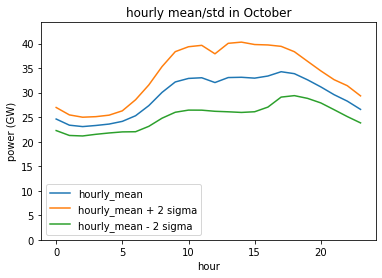

In [7]:
# 10月は7月と水準は異なるが、日中安定している点は共通している。
df_oct = df[df.index.month == 10]

hour_mean = df_oct.groupby("hour").mean()["power"]
hour_std = df_oct.groupby("hour").std()["power"]

hour_mean.plot(label='hourly_mean')
(hour_mean + 2 * hour_std) .plot(label='hourly_mean + 2 sigma')
(hour_mean - 2 * hour_std) .plot(label='hourly_mean - 2 sigma')

plt.title('hourly mean/std in October')
plt.legend()
plt.ylim(0, (hour_mean + 2 * hour_std).max() * 1.1)
plt.ylabel('power (GW)')
plt.show()

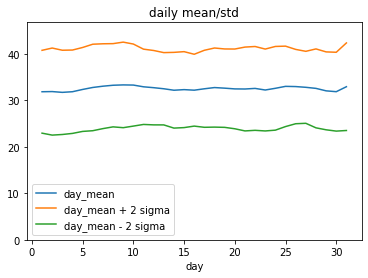

In [8]:
# 日で見ても際立った特徴はなさそう（五十日は見えない）
df['DATE'] = df.index.date
df['day'] = df.index.day

day_mean = df.groupby("DATE").mean().groupby("day").mean()["power"]
day_std = df.groupby("DATE").mean().groupby("day").std()["power"]

day_mean.plot(label='day_mean')
(day_mean + 2 * day_std) .plot(label='day_mean + 2 sigma')
(day_mean - 2 * day_std) .plot(label='day_mean - 2 sigma')

plt.title('daily mean/std')
plt.legend()
plt.ylim(0, (day_mean + 2 * day_std).max() * 1.1)
plt.show()

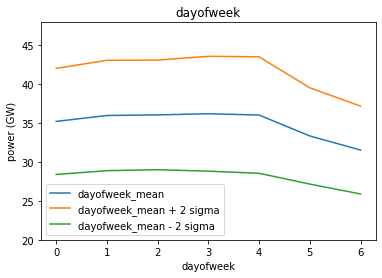

In [9]:
# 月・火〜金・土・日と水準が分かれる。
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

df_qu = df[df['month'].isin([1, 2, 3])]
dayofweek_mean = df_qu.groupby("DATE").mean().groupby("dayofweek").mean()["power"]
dayofweek_std = df_qu.groupby("DATE").mean().groupby("dayofweek").std()["power"]

dayofweek_mean.plot(label='dayofweek_mean')
(dayofweek_mean + 2 * dayofweek_std) .plot(label='dayofweek_mean + 2 sigma')
(dayofweek_mean - 2 * dayofweek_std) .plot(label='dayofweek_mean - 2 sigma')

plt.title('dayofweek')

plt.legend()
plt.ylim(20, (dayofweek_mean + 2 * dayofweek_std).max() * 1.1)
plt.ylabel('power (GW)')
plt.show()

In [10]:
from scipy import stats

dayofweek_map = {0:"MON", 
                 1:"TUE",
                2:"WED",
                3:"THU",
                4:"FRI",
                5:"SAT",
                6:"SUN"}

for a in range(7):
    for b in range(7)[a:]:
        if a == b:
            continue
        arr_a = df.groupby("DATE").mean().query(f'dayofweek == {a}')['power']
        arr_b = df.groupby("DATE").mean().query(f'dayofweek == {b}')['power']
        length = min(len(arr_a), len(arr_b))
        t, p = stats.ttest_rel(arr_a[:length], arr_b[:length])
        if p < 0.05:
            flg = "*"
        else:
            flg = ""
        print( f"{dayofweek_map[a]} vs {dayofweek_map[b]}　p値 = {p:.3f} {flg}")

MON vs TUE　p値 = 0.000 *
MON vs WED　p値 = 0.000 *
MON vs THU　p値 = 0.000 *
MON vs FRI　p値 = 0.000 *
MON vs SAT　p値 = 0.000 *
MON vs SUN　p値 = 0.000 *
TUE vs WED　p値 = 0.728 
TUE vs THU　p値 = 0.931 
TUE vs FRI　p値 = 0.360 
TUE vs SAT　p値 = 0.000 *
TUE vs SUN　p値 = 0.000 *
WED vs THU　p値 = 0.672 
WED vs FRI　p値 = 0.502 
WED vs SAT　p値 = 0.000 *
WED vs SUN　p値 = 0.000 *
THU vs FRI　p値 = 0.388 
THU vs SAT　p値 = 0.000 *
THU vs SUN　p値 = 0.000 *
FRI vs SAT　p値 = 0.000 *
FRI vs SUN　p値 = 0.000 *
SAT vs SUN　p値 = 0.000 *


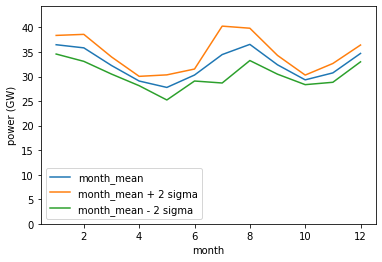

In [11]:
df['year'] = df.index.year

month_mean = df.groupby("DATE").mean().groupby(["month", "year"]).mean().groupby("month").mean()["power"]
month_std = df.groupby("DATE").mean().groupby(["month", "year"]).mean().groupby("month").std()["power"]

month_mean.plot(label='month_mean')
(month_mean + 2 * month_std) .plot(label='month_mean + 2 sigma')
(month_mean - 2 * month_std) .plot(label='month_mean - 2 sigma')

plt.legend()
plt.ylim(0, (month_mean + 2 * month_std).max() * 1.1)
plt.xlabel('month')
plt.ylabel('power (GW)')

plt.show()

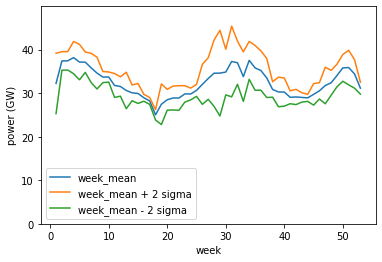

In [12]:
df['week'] = pd.to_datetime(df['DATE']).dt.isocalendar().week

week_mean = df.groupby("DATE").mean().groupby(["week", "year"]).mean().groupby("week").mean()["power"]
week_std = df.groupby("DATE").mean().groupby(["week", "year"]).mean().groupby("week").std()["power"]

week_mean.plot(label='week_mean')
(week_mean + 2 * week_std) .plot(label='week_mean + 2 sigma')
(week_mean - 2 * week_std) .plot(label='week_mean - 2 sigma')

plt.legend()
plt.ylim(0, (week_mean + 2 * week_std).max() * 1.1)
plt.xlabel('week')
plt.ylabel('power (GW)')

plt.show()